# 13. Ordinary Differential Equations: Pedulums
---
**Content:**
- [Animated Plots](#Animated-Plots)
- [Simple Pendulum](#Simple-Pendulum)
- [Spring Pendulum](#Spring-Pendulum)
- [Double Pendulum](#Double-Pendulum)

In [ ]:
import numpy             as np
import matplotlib.pyplot as plt
import scipy.integrate   as integrate

## Animated Plots
---

In [ ]:
# use matplotlib's animation package
import matplotlib
import matplotlib.animation as animation

# set the animation style to "jshtml" (for the use in Jupyter)
matplotlib.rcParams['animation.html'] = 'jshtml'

In [ ]:
# create figure for the animation
fig = plt.figure(1)
plt.grid(True)
plt.xlim([0, 20])
plt.ylim([-2, 2])

# create a mass object for the animation
mass, = plt.plot(0, 0, 'o', markersize=12)

# prevent its showing
plt.close()

In [ ]:
# define an animation function
def animate(f):
    
    # moving the mass
    x = f
    y = np.sin(f/20 * 2.0*np.pi)
    
    mass.set_data(x,y)

# create the animation
frames = np.arange(0, 20)

myAnimation = animation.FuncAnimation(fig, 
                                      animate, 
                                      frames, 
                                      interval = 50)
# show animation
myAnimation

## Simple Pendulum
---
<table>
    <tr>
        <td width=60%>
        <center>
        Second-oder ODE for the angle $\varphi$:   <br>   
        $$\large \frac{\partial^2 \varphi}{\partial t^2} = - \frac{g}{l} \sin{\varphi}$$
        <br>
        Coupled system of first-order ODEs:<br>
        $$ \large \pmatrix{ \dot{\varphi} \\ \dot{\omega}} = \pmatrix{ \omega \\ - \frac{g}{l} \sin{\varphi} }$$
        </center>   
        </td>
        <td>
<center>

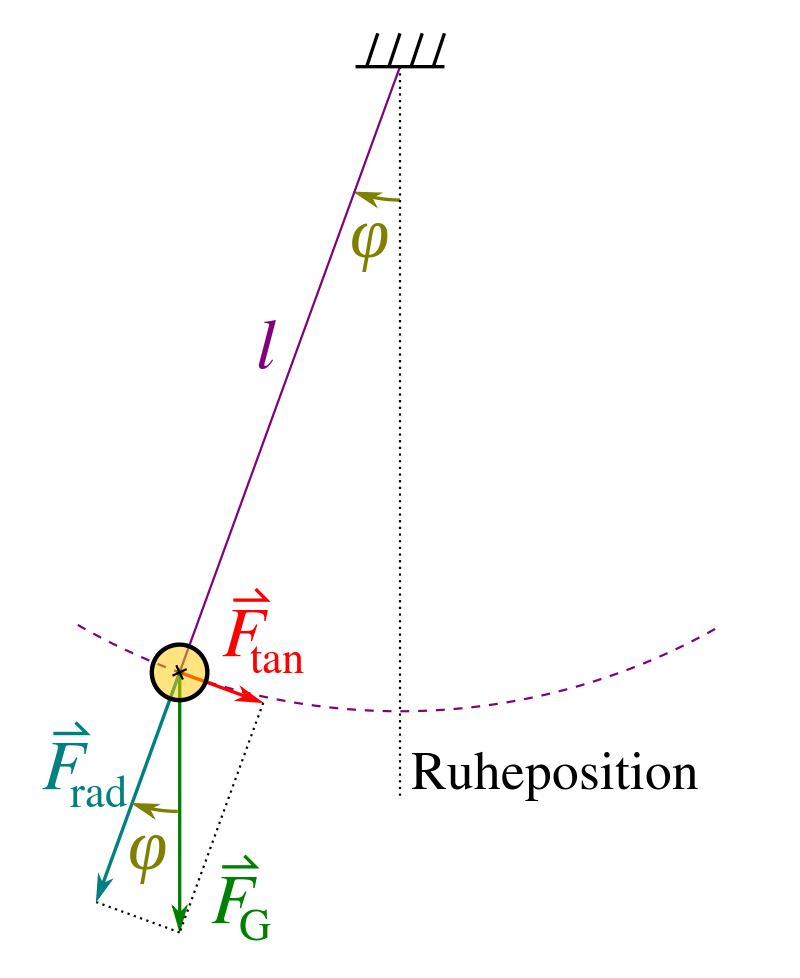
    
</center>
        </td>
    </tr>
</table>

In [ ]:
# settings
g = 9.8
l = 10.0

# setup time axis
tStep = 0.05
tMin  = 0
tMax  = 20.0
time  = np.arange(tMin, tMax, tStep)

# initial values
y0 = [45/180*np.pi, 0]

# define F function
def FPendulum(t, y):
    F    = np.zeros(2)
    F[0] = y[1]
    F[1] = -(g/l) * np.sin(y[0])
    return F

# get the solution via odeint
sol = integrate.solve_ivp(FPendulum, (tMin, tMax), y0, t_eval=time)

# plot it
plt.figure(1)
plt.plot(sol.t, sol.y[0, :], ".")
plt.xlabel('$t$')
plt.ylabel('$\\varphi(t)$')
plt.show()

In [ ]:
# create figure for the animation
fig = plt.figure(1, figsize = (8,4))
plt.grid()
plt.xlim([-12, 12])
plt.ylim([-11, 1])

# create a mass object for the animation
mass, = plt.plot(0, -l, 'o', markersize=12)

# prevent its showing
plt.close()

# define an animation function
def animate(f):
    
    # get x/y position from phi and l
    x =  l * np.sin(sol.y[0, f])
    y = -l * np.cos(sol.y[0, f])
    
    # move mass to x/y
    mass.set_data(x, y)

# create the animation
frames = np.arange(0, np.size(time))

myAnimation = animation.FuncAnimation(fig, animate, frames, interval = 25)

# show animation
myAnimation

In [ ]:
# create figure for the animation
fig = plt.figure(1, figsize = (8,4))
plt.grid()
plt.xlim([-12, 12])
plt.ylim([-11, 1])

# create line/mass objects for the animation
line, = plt.plot([0,0], [0, -l])
mass, = plt.plot(0, -l, 'o', markersize=12)

# prevent its showing
plt.close()

# define an animation function
def animate(i):
    
    # get x/y position from phi and l
    x =  l * np.sin(sol.y[0, i])
    y = -l * np.cos(sol.y[0, i])
    
    # move mass to x/y
    mass.set_data(x, y)
    
    # move line
    line.set_data([0, x], [0, y])

# create the animation
frames = np.arange(0, np.size(time))
myAnimation = animation.FuncAnimation(fig, animate, frames, interval = 25)
# show animation
myAnimation

## Spring Pendulum
---

<center>https://sites.google.com/site/kolukulasivasrinivas/mechanics/spring-pendulum</center>

$$\large
\pmatrix{ \dot{\theta} \\ 
          \dot{\omega} \\ 
          \dot{r}    \\
          \dot{v} \\ }
=
\pmatrix{ \omega \\ 
          -\frac{2}{l+r} v \omega + \omega_\theta^2 sin(\theta) \\ 
          v    \\
          (l + r) \omega^2 + g cos(\theta) - \omega_r^2 r \\ }
$$

In [ ]:
# settings
g      = 9.81           # acceleration due to gravity, in m/s^2
M      = 1.0            # Mass of attachment in kg
spring = {'m' : 1.0,    # Mass of spring in kg
          'k' : 100.0,  # Spring constant Nm^-1
          'l' : 0.1   } # Rest length in m
    
# setup time axis
tStep      = 0.05
tMin, tMax = 0, 10.0
time       = np.arange(tMin, tMax, tStep)

# initial values
y0 = np.array([45.0/180.0*np.pi, 
               0, 
               M*g/spring['k'], 
               0]) 

# return derivatives of the array y (= [theta, w, x, v])
def FSpringPendulum(t, y):

    m = spring['m']
    k = spring['k']
    l = spring['l']
    
    th, w, x, v = y
    
    wTh = np.sqrt( g / (l + x) )
    wX  = np.sqrt( k / m )
    
    thDot = w
    wDot  = -2.0 / (l + x) * v * w - wTh**2.0 * np.sin(th)
    xDot  = v
    vDot  = (l + x) * w**2.0 + g * np.cos(th) - wX**2.0 * x
    
    return thDot, wDot, xDot, vDot

# get the solution via odeint
sol = integrate.solve_ivp(FSpringPendulum, (tMin, tMax), y0, t_eval=time)

# plot it
plt.figure(1)
plt.plot(sol.t, sol.y[0, :], label='$\\theta$')
plt.plot(sol.t, sol.y[2, :], label='$x$')
plt.xlabel('$t$')
plt.ylabel('$\\theta(t)$')
plt.legend()
plt.show()

In [ ]:
# create figure for the animation
fig = plt.figure(1, figsize = (6,3))
plt.grid()
plt.xlim([-0.505, 0.505])
plt.ylim([-0.5, 0.05])

# create line/mass objects for the animation
line, = plt.plot([0,0], [0, -l])
mass, = plt.plot(0, -l, 'o', markersize=12)

# prevent its showing
plt.close()

# define an animation function
def animate(i):
    
    # get x/y position from theta, x, and l
    
    l  = spring['l']
    r  = l + sol.y[2, :]
    th = sol.y[0, :]

    x  =  r*np.sin(th)
    y  = -r*np.cos(th)
    
    # move mass to x/y
    mass.set_data(x[i], y[i])
    
    # move line
    line.set_data([0, x[i]], [0, y[i]])


# create the animation
frames = np.arange(0, np.size(time))
myAnimation = animation.FuncAnimation(fig, animate, frames, interval = 75)

# show animation
myAnimation

## Double Pendulum
---
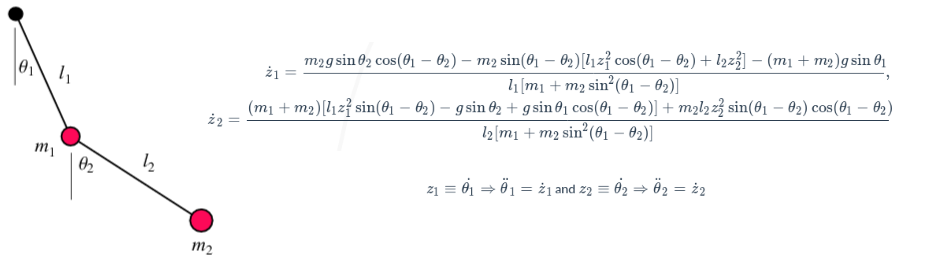
<center>https://scipython.com/blog/the-double-pendulum/</center>

In [ ]:
# settings
g  = 1.0            # acceleration due to gravity, in m/s^2
L1, L2 = 1.0, 0.51  # length of pendulum 1 and 2 in m
m1, m2 = 4.0, 0.51  # mass   of pendulum 1 and 2 in kg

# setup time axis
tStep      = 0.05
tMin, tMax = 0, 60.0
time       = np.arange(tMin, tMax, tStep)

# th10, w10, th20, w20 initial angles and angular velocities 
# in degrees / degrees per second
y0 = np.array([170.0, 0.0, 30.0, 0.0]) * np.pi/180.0

# define double pendulum function
# with:  y = [th1, z1, th2, z2]
def FDoublePendulum(t, y):

    th1, z1, th2, z2 = y

    c = np.cos(th1 - th2)
    s = np.sin(th1 - th2)

    th1dot = z1
    
    z1dot  = (m2*g*np.sin(th2)*c - m2*s*(L1*z1**2*c + L2*z2**2) -
             (m1+m2)*g*np.sin(th1)) / L1 / (m1 + m2*s**2)
    
    th2dot = z2
    
    z2dot  = ((m1+m2)*(L1*z1**2*s - g*np.sin(th2) + g*np.sin(th1)*c) + 
             m2*L2*z2**2*s*c) / L2 / (m1 + m2*s**2)
    
    return th1dot, z1dot, th2dot, z2dot

# get the solution via odeint
sol = integrate.solve_ivp(FDoublePendulum, (tMin, tMax), y0, t_eval=time)

# plot it
plt.figure(1)
plt.plot(sol.t, sol.y[0, :])
plt.plot(sol.t, sol.y[2, :])
plt.xlabel('$t$')
plt.ylabel('$\\varphi_{1,2}(t)$')
plt.show()

In [ ]:
# create figure for the animation
fig = plt.figure(1, figsize = (4,4))
plt.grid()
plt.gca().set_xlim([-1.8, 1.8])
plt.gca().set_ylim([-1.8, 1.8])

# create a line with 2 dots for the animation
line, = plt.plot([0,2,-2], [0,2,-2], 'o-')

# prevent its showing
plt.close()

# define an animation function
def animate(i):
    
    # get x/y position from phi and l for both points
    x1 =  L1 * np.sin(sol.y[0, i])
    y1 = -L1 * np.cos(sol.y[0, i])

    x2 =  L2 * np.sin(sol.y[2, i]) + x1
    y2 = -L2 * np.cos(sol.y[2, i]) + y1
    
    # move line
    line.set_data([0, x1, x2], [0, y1, y2])

# create the animation
frames = np.arange(0, np.size(time))
myAnimation = animation.FuncAnimation(fig, animate, frames, interval = 25)
# show animation
myAnimation